# The mean EBL

This example shows how to plot the mean EBL spectrum, including data and optionally models, without using the built-in `plot_ebl_spectrum` routine (as covered in the `README`). The idea here is to showcase how to customize this plot to your liking, e.g., in terms of plot symbols, colors, linestyles, labels, and so on, which is all very difficult to automate in a way that will be satisfying to everyone.

To begin, a few imports:

In [1]:
%matplotlib inline

In [2]:
import ebl_utils
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Uncomment this if you like a dark background
#pl.style.use('dark_background')

Here we define a function that initializes a set of axes. This can be nice if you want to build this plot dataset-by-dataset or model-by-model (e.g., for a talk), and be sure that the axes limits and tick marks are identical for each.

In [4]:
def get_fig(**kwargs):
    """
    Setup a plot window for mean EBL w/ labels, nice ticks, etc.
    """
    fig, ax = plt.subplots(1, 1, **kwargs)

    ax.set_xscale('log')
    ax.set_xticks([1,2,3,4,5], minor=False)
    ax.set_xticks(np.arange(0.3, 1, 0.1), minor=True)
    ax.set_xticklabels(['1', '2', '3', '4', '5'])
    ax.set_xlim(0.2, 5.3)
    ax.set_yscale('log')
    ax.set_ylim(1, 100)
    ax.set_xlabel(r'$\lambda \ [\mu\rm{m}]$', fontsize=24)
    ax.set_ylabel(r'$\lambda I_{\lambda} \ [\rm{nW} \ \rm{m}^{-2} \ \rm{sr}^{-1}]$',
        fontsize=24)

    return fig, ax

Now, let's initialize a plot window and plot constraints from a few different experiments. Notice that each experiment may have more than one associated study -- by default here, we'll plot them all, but in general you may want to take only the most recent (if, e.g., a newer study should really supercede an older one).

/var/folders/4x/5l6hm8zn5z5dcykydpc666sm0000gq/T/ipykernel_90102/1811367920.py:22: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(_waves, _mean, yerr=_err, **dset.style)


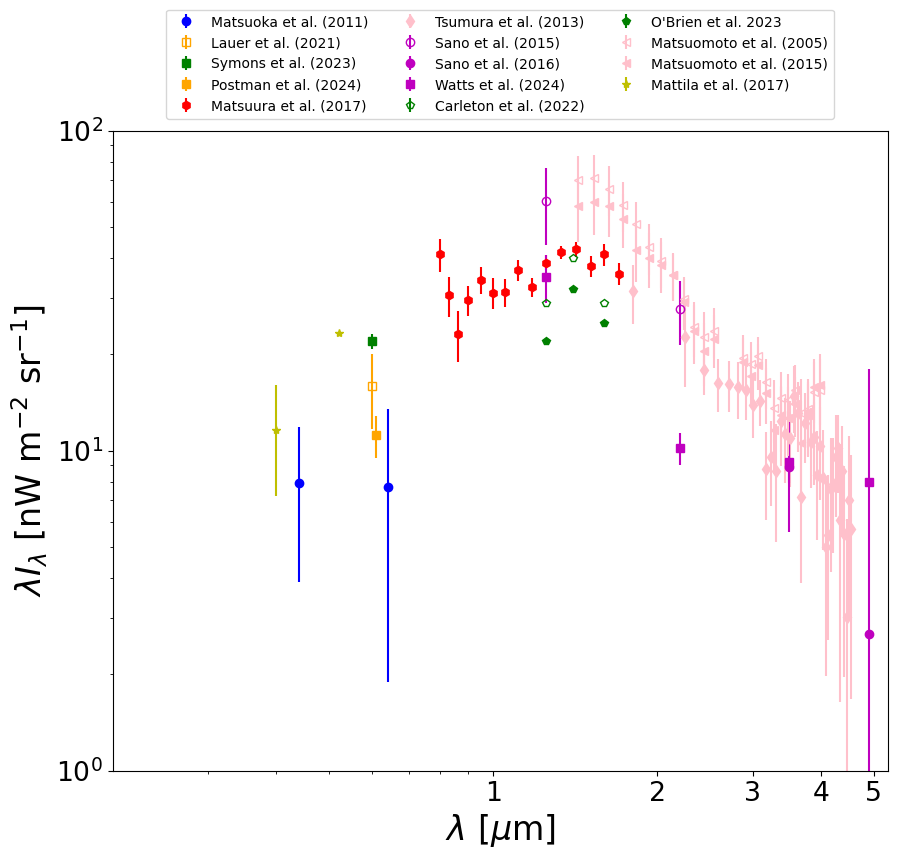

In [5]:
fig, ax = get_fig(num=1, figsize=(10, 10))

# Note: incomplete set of experiments! 
for experiment in ['pioneer', 'newhorizons', 'ciber', 'akari', 'dirbe', 'skysurf', 'irts', 'vlt']:
    
    # Main method in ebl_utils is read. Creates object that contains everything we need.
    dataset = ebl_utils.read(experiment)
    
    # For experiments, there could be multiple associated papers, so we loop over `all_datasets`
    for dset in dataset.all_datasets:
        
        # Now, only interested in mean EBL, so move along 
        # if we don't find the get_ebl_spectrum method.
        if not hasattr(dset, 'get_ebl_spectrum'):
            continue
        
        # This is the convention for `get_ebl_spectrum` throughout.
        _waves, _mean, _err = dset.get_ebl_spectrum()
        
        # Being careful here: some datasets provide asymmetric errors
        if np.array(_err).ndim == 1:
            ax.errorbar(_waves, _mean, yerr=_err, **dset.style)
        else:
            # The numpy slicing voodoo here is because `yerr` expects asymmetric 
            # errors to be provided in -/+ order, and the transpose is because 
            # `yerr` has to be (2, N), not (N, 2) as we natively store things.
            ax.errorbar(_waves, _mean, yerr=np.array(_err)[:,-1::-1].T, **dset.style)
            
# In this case, we elected to label by the name of the study, not the experiment.
ax.legend(fontsize=10, bbox_to_anchor=(0.5, 1.2), loc='upper center', ncols=3, columnspacing=2)

 # Make room for legend
fig.subplots_adjust(top=0.75)

# Save
plt.savefig('ebl_mean_data.png', bbox_inches='tight')

OK, that's all well and good. Now let's add a few models. We'll start by copy-pasting what we already did and then add another loop below.

/var/folders/4x/5l6hm8zn5z5dcykydpc666sm0000gq/T/ipykernel_90102/2225440998.py:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(_waves, _mean, yerr=_err, **dset.style)


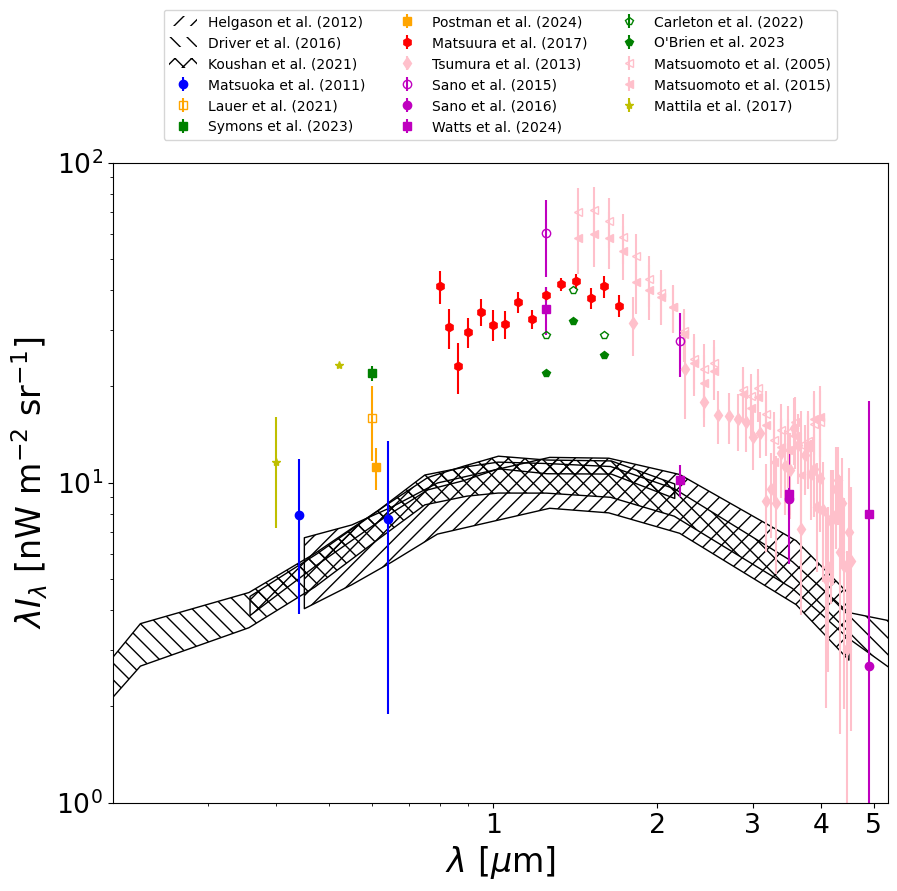

In [10]:
## copy-pasted from previous cell ##
fig, ax = get_fig(num=1, figsize=(10, 10))

# Note: incomplete set of experiments! Feel free to also add, e.g., 'irts', 'skysurf', 'dirbe'
for experiment in ['pioneer', 'newhorizons', 'ciber', 'akari', 'dirbe', 'skysurf', 'irts', 'vlt']:
    
    # Main method in ebl_utils is read. Creates object that contains everything we need.
    dataset = ebl_utils.read(experiment)
    
    # For experiments, there could be multiple associated papers, so we loop over `all_datasets`
    for dset in dataset.all_datasets:
        
        # Now, only interested in mean EBL, so move along 
        # if we don't find the get_ebl_spectrum method.
        if not hasattr(dset, 'get_ebl_spectrum'):
            continue
        
        # This is the convention for `get_ebl_spectrum` throughout.
        _waves, _mean, _err = dset.get_ebl_spectrum()
        
        # Being careful here: some datasets provide asymmetric errors
        if np.array(_err).ndim == 1:
            ax.errorbar(_waves, _mean, yerr=_err, **dset.style)
        else:
            # The numpy slicing voodoo here is because `yerr` expects asymmetric 
            # errors to be provided in -/+ order, and the transpose is because 
            # `yerr` has to be (2, N), not (N, 2) as we natively store things.
            ax.errorbar(_waves, _mean, yerr=np.array(_err)[:,-1::-1].T, **dset.style)
               
## copy-pasted from previous cell ##

##
# New stuff here
hatch = '//', '\\\\', 'xx'
for i, model in enumerate(['helgason2012', 'driver2016', 'koushan2021']):
    dset = ebl_utils.read(model)
    
    _waves, _mean, _err = dset.get_ebl_spectrum()
    
    # Again, could have asyemmetric errors.
    # Here, rather than plotting plot symbols with error bars, we 
    # use fill_between to illustrate model's preferred range.
    if np.array(_err).ndim == 1:
        lo = np.array(_mean) - np.array(_err)
        hi = np.array(_mean) + np.array(_err)
        ax.fill_between(_waves, lo, hi, facecolor='none', hatch=hatch[i], label=dset.name)
    else:
        lo = np.array(_mean) - np.array(_err)[:,1]
        hi = np.array(_mean) + np.array(_err)[:,0]
        ax.fill_between(_waves, lo, hi, facecolor='none', hatch=hatch[i], label=dset.name)
            
        # You're welcome also to just plot the best-fit model
        #ax.plot(_waves, _mean, label=dset.name) 
    
# In this case, we elected to label by the name of the study, not the experiment.
ax.legend(fontsize=10, bbox_to_anchor=(0.5, 1.25), loc='upper center', ncols=3, columnspacing=2)

 # Make room for legend
fig.subplots_adjust(top=0.75)

plt.savefig('ebl_mean_data_models.png', bbox_inches='tight')

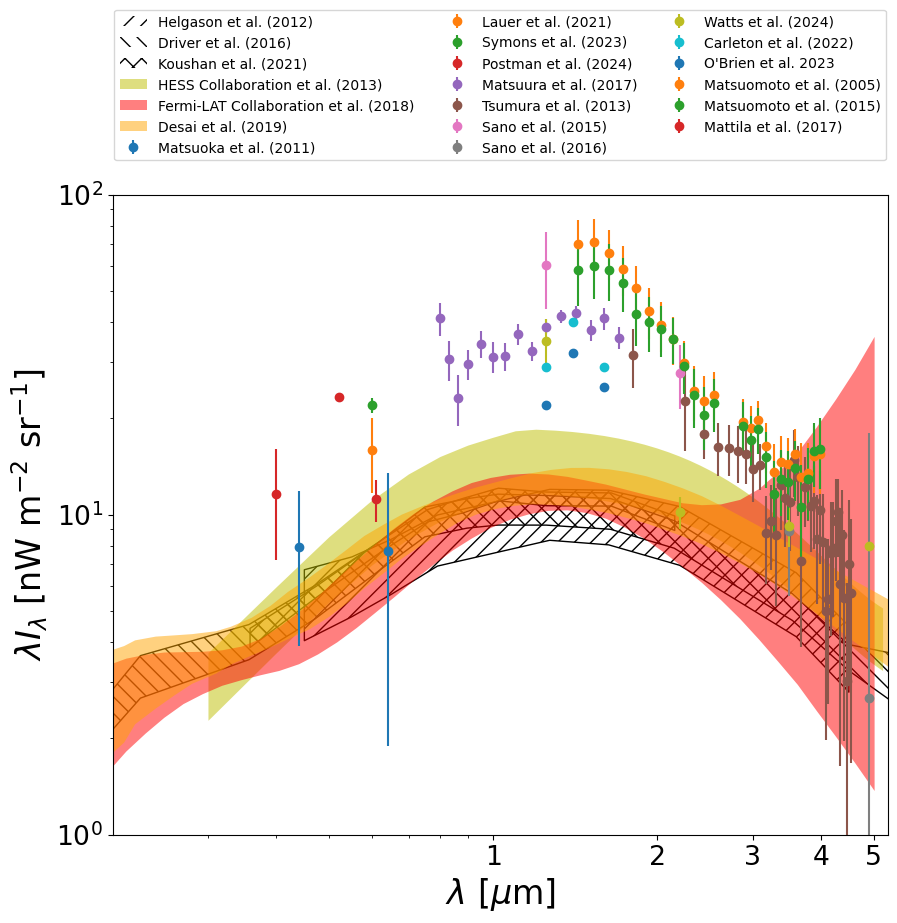

In [9]:
## copy-pasted from previous cell ##
fig, ax = get_fig(num=1, figsize=(10, 10))

for experiment in ['pioneer', 'newhorizons', 'ciber', 'akari', 'dirbe', 'skysurf', 'irts', 'vlt']:
    dataset = ebl_utils.read(experiment)
    for dset in dataset.all_datasets:
        if not hasattr(dset, 'get_ebl_spectrum'):
            continue
        
        # This is the convention for `get_ebl_spectrum` throughout.
        # Note that some datasets provide asymmetric errors and some don't!
        _waves, _mean, _err = dset.get_ebl_spectrum()
        
        # Being careful here: some datasets provide asymmetric errors
        if np.array(_err).ndim == 1:
            ax.errorbar(_waves, _mean, yerr=_err, fmt='o', label=dset.name)
        else:
            # The numpy slicing voodoo here is because `yerr` expects asymmetric 
            # errors to be provide in -/+ order, and the transpose is because 
            # `yerr` has to be (2, N), not (N, 2) as we natively store things.
            ax.errorbar(_waves, _mean, yerr=np.array(_err)[:,-1::-1].T, 
                fmt='o', label=dset.name)
   

##
# Models
hatch = '//', '\\\\', 'xx'
for i, model in enumerate(['helgason2012', 'driver2016', 'koushan2021']):
    dset = ebl_utils.read(model)
    
    _waves, _mean, _err = dset.get_ebl_spectrum()
    
    if np.array(_err).ndim == 1:
        lo = np.array(_mean) - np.array(_err)
        hi = np.array(_mean) + np.array(_err)
        ax.fill_between(_waves, lo, hi, facecolor='none', hatch=hatch[i], label=dset.name)
    else:
        lo = np.array(_mean) - np.array(_err)[:,1]
        hi = np.array(_mean) + np.array(_err)[:,0]
        ax.fill_between(_waves, lo, hi, facecolor='none', hatch=hatch[i], label=dset.name)
            
        # You're welcome also to just plot the best-fit model
        #ax.plot(_waves, _mean, label=dset.name) 
    
## copy-pasted from previous cell ##
    
##
# Now add HESS, Fermi
colors = 'y', 'r', 'orange'
for i, gammaray in enumerate(['hess2013', 'fermi2018', 'desai2019']):
    dset = ebl_utils.read(gammaray)
    _waves, _mean, _err = dset.get_ebl_spectrum()

    ax.fill_between(_waves, np.array(_mean) - np.array(_err).T[1],
                           np.array(_mean) + np.array(_err).T[0],
        facecolors=colors[i], label=dset.name, alpha=0.5)

# In this case, we elected to label by the name of the study, not the experiment.
ax.legend(fontsize=10, bbox_to_anchor=(0.5, 1.3), loc='upper center', ncols=3, columnspacing=2)

 # Make room for legend
fig.subplots_adjust(top=0.75)

plt.savefig('ebl_mean_data_models_gammarays.png', bbox_inches='tight')